In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

In [2]:
def haversine_distance_two(point_A, point_B):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    """
    lat1, lon1 = point_A
    lat2, lon2 = point_B
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [3]:
river_sources = pd.read_csv('../data/sources/Lebreton_rivers/PlasticRiverInputs.csv')

In [4]:
river_sources.keys()

Index(['X', 'Y', 'i_mid', 'i_low', 'i_high', 'i_mid_jan', 'i_low_jan',
       'i_high_jan', 'i_mid_feb', 'i_low_feb', 'i_high_feb', 'i_mid_mar',
       'i_low_mar', 'i_high_mar', 'i_mid_apr', 'i_low_apr', 'i_high_apr',
       'i_mid_may', 'i_low_may', 'i_high_may', 'i_mid_jun', 'i_low_jun',
       'i_high_jun', 'i_mid_jul', 'i_low_jul', 'i_high_jul', 'i_mid_aug',
       'i_low_aug', 'i_high_aug', 'i_mid_sep', 'i_low_sep', 'i_high_sep',
       'i_mid_oct', 'i_low_oct', 'i_high_oct', 'i_mid_nov', 'i_low_nov',
       'i_high_nov', 'i_mid_dec', 'i_low_dec', 'i_high_dec', 'runoff_jan',
       'runoff_feb', 'runoff_mar', 'runoff_apr', 'runoff_may', 'runoff_jun',
       'runoff_jul', 'runoff_aug', 'runoff_sep', 'runoff_oct', 'runoff_nov',
       'runoff_dec', 'mpw', 'area'],
      dtype='object')

In [5]:
city_coords = {'Luanda':(-8.82, 13.22),
            'Benguela':(-12.58, 13.39),
            'Cape-Town':(-33.93, 18.56),
            'Buenos-Aires':(-34.58, -58.36),
            'Rio-de-Janeiro':(-23, -43.3),
            'Salvador':(-13, -38.45),
            'Recife':(-8.09, -34.88),
            'Santos(Sao-Paulo)':(-23.98,-46.361),
            'Montevideo':(-34.91, -56.15), 'Pointe-Noire':(-4.8, 11.84)}

In [6]:
def rivers_per_location(DF, loc_coords, radius):
    """
    DF is the River_sources dataframes. loc_coords is the location coordinates.
    radius is the radius of in degrees around loc_coords.
    Returns the dataframe around loc_coords.
    """
    lat, lon = loc_coords
    mask = (DF['X'] <= lon + radius) & (DF['X'] > lon - radius) & (DF['Y'] <= lat + radius) & (DF['Y'] > lat - radius)
    new_DF = DF[mask]
    return new_DF

def region_filters(DF, lon_min, lon_max, lat_min, lat_max):
    """
    DF is the River_sources dataframes. lat_min, lat_max, lon_min, lon_max are the domain limits.
    Returns the dataframe only for the region.
    """
    mask = (DF['X'] <= lon_max) & (DF['X'] > lon_min) & (DF['Y'] <= lat_max) & (DF['Y'] > lat_min)
    new_DF = DF[mask]
    return new_DF

In [7]:
South_Atlantic_region = (-70, 25, -50, -5)

In [8]:
Rio_rivers = rivers_per_location(river_sources, city_coords['Rio-de-Janeiro'], 0.2)

In [9]:
SAG_rivers = region_filters(river_sources, *South_Atlantic_region)

In [30]:
SAG_rivers

,X,Y,i_mid,i_low,i_high,i_mid_jan,i_low_jan,i_high_jan,i_mid_feb,i_low_feb,...,runoff_may,runoff_jun,runoff_jul,runoff_aug,runoff_sep,runoff_oct,runoff_nov,runoff_dec,mpw,area
2452,12.020833,-5.037500,3.599665,1.757410,10.497470,0.330902,0.156224,0.999232,0.629068,0.310066,...,1.669245,0.371170,0.112929,0.040477,0.027014,0.363428,4.973089,3.328626,1.135720e+06,7.365000e+08
2457,12.104167,-5.162500,0.014340,0.005125,0.058823,0.001049,0.000355,0.004558,0.002631,0.000944,...,2.436256,0.544310,0.137236,0.047556,0.033318,0.794878,11.040690,5.915197,1.593680e+04,3.590000e+07
2459,12.137500,-5.204167,160.931626,97.080530,372.223891,18.050214,10.741337,42.337150,26.878723,16.464646,...,2.382827,0.405017,0.124746,0.032019,0.022962,0.298411,2.550895,2.562979,1.620320e+07,1.317420e+10
2468,12.212500,-5.429167,0.031909,0.011892,0.125015,0.002021,0.000710,0.008423,0.005377,0.002012,...,4.253898,0.782490,0.210617,0.046489,0.028424,1.783523,13.120873,7.033172,2.128220e+04,5.210000e+07
2470,12.220833,-5.462500,1.342190,0.619845,4.160276,0.092403,0.040520,0.302452,0.233546,0.108698,...,4.400636,0.796983,0.242650,0.068841,0.047406,1.576548,12.078950,6.841939,2.573060e+05,4.513000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39564,-68.620833,-49.945833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.104908,0.128176,0.187116,0.179610,0.148997,0.100616,0.079531,0.076160,8.291300e+01,3.040000e+07
39565,-68.504167,-49.945833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.129855,0.156749,0.209314,0.197067,0.168909,0.113787,0.083872,0.074368,4.376000e+01,1.490000e+07
39568,-68.620833,-49.962500,0.004789,0.001536,0.022060,0.000426,0.000137,0.001959,0.000402,0.000129,...,0.879635,0.714476,0.584262,0.535072,0.715400,0.818855,0.831618,0.801182,4.251450e+04,2.705620e+10
39570,-67.870833,-49.970833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.247040,0.240534,0.280626,0.268234,0.258034,0.211518,0.170115,0.151919,3.817000e+01,1.490000e+07


In [31]:
sorted_rivers = SAG_rivers.sort_values('i_high', ascending=False)

In [32]:
sorted_rivers = sorted_rivers.reset_index()

In [35]:
sorted_rivers

,index,X,Y,i_mid,i_low,i_high,i_mid_jan,i_low_jan,i_high_jan,i_mid_feb,...,runoff_may,runoff_jun,runoff_jul,runoff_aug,runoff_sep,runoff_oct,runoff_nov,runoff_dec,mpw,area
0,38245,-58.520833,-33.937500,3055.040065,2174.146507,5908.181816,637.172468,466.036718,1193.190344,566.458126,...,0.392149,0.410753,0.254233,0.149721,0.164874,0.308744,0.312645,0.580942,3.341920e+08,2.593919e+12
1,37773,-41.037500,-21.620833,637.592368,426.756466,1319.697845,282.635241,197.222105,557.164060,109.725205,...,0.563785,0.289560,0.226841,0.193345,0.294793,0.534659,1.659767,4.743814,2.566580e+07,5.735200e+10
2,37815,-43.779167,-22.929167,420.592135,274.635938,894.433239,178.758176,121.472821,362.737768,76.954475,...,0.592376,0.294719,0.409402,0.261267,0.561987,0.743999,1.696857,5.946026,1.681990e+07,2.073500e+09
3,37804,-43.254167,-22.762500,275.976991,175.144698,605.220866,100.967503,66.379716,212.413513,50.251490,...,0.833784,0.457673,0.486845,0.270118,0.596972,0.748061,2.270988,7.452616,1.143150e+07,7.757000e+08
4,2459,12.137500,-5.204167,160.931626,97.080530,372.223891,18.050214,10.741337,42.337150,26.878723,...,2.382827,0.405017,0.124746,0.032019,0.022962,0.298411,2.550895,2.562979,1.620320e+07,1.317420e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,3711,16.579167,-28.795833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.078670e+03,5.190000e+07
1508,3710,16.570833,-28.745833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003945,0.004547,0.004119,0.004188,0.003802,0.004578,0.003813,0.003623,3.997070e+03,3.990000e+07
1509,3708,16.504167,-28.670833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003945,0.004546,0.004121,0.004188,0.003804,0.004576,0.003814,0.003625,2.698770e+03,2.560000e+07
1510,4001,20.045833,-34.779167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.682340e+02,2.050000e+07


In [33]:
city_coords["Montevideo"]

(-34.91, -56.15)

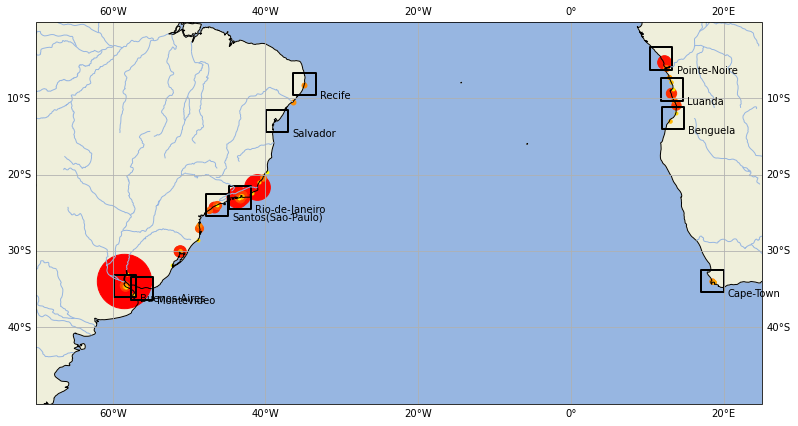

In [34]:
N = 50

x_colors = np.linspace(0, 1, N)
colors = cm.get_cmap('autumn')(x_colors)

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -50, 0), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
for i in range(N):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i], s=sorted_rivers['i_high'][i]*0.5, color=colors[i])
    
for city in city_coords.keys():
    ax.scatter(city_coords[city][1], city_coords[city][0], 
               s=500, marker='s', linewidths=2, edgecolors='k', facecolor="None")
    ax.text(city_coords[city][1]+2, city_coords[city][0]-2, s=city)

#ax.legend(loc='upper left', shadow=True)


In [88]:
cluster_locations = {'Luanda':(-8.82, 13.22),
                     'Cuvo':(-10.87917, 13.81250),
                     'Chiloango-Congo':(-5.6442, 12.1375),
                     'Cape-Town':(-33.93, 18.56),
                    'Rio-de-la-Plata':(-33.9375, -58.5208),
                    'Porto-Alegre':(-30.051, -51.285),
                    'Santos':(-23.9875, -46.2958),
                    'Paraiba':(-21.6208, -41.0375),
                    'Itajai':(-26.9125, -48.6458),
                    'Rio-de-Janeiro':(-23.01250, -43.32083),
                    'Sao-Francisco':(-10.509, -36.394),
                    'Capibaribe':(-8.09, -34.88)}

In [78]:
cluster_locations.keys()

dict_keys(['Luanda', 'Cuvo', 'Chiloango-Congo', 'Cape-Town', 'Rio-de-la-Plata', 'Porto-Alegre', 'Santos', 'Paraiba', 'Itajai', 'Rio-de-Janeiro', 'Salvador', 'Recife'])

In [79]:
n = 100
set_data = 'i_low'
percent_n_rivers = sorted_rivers[set_data][:n]/sorted_rivers[set_data][:].sum()

In [80]:
percent_n_rivers.sum()

0.9947374803761058

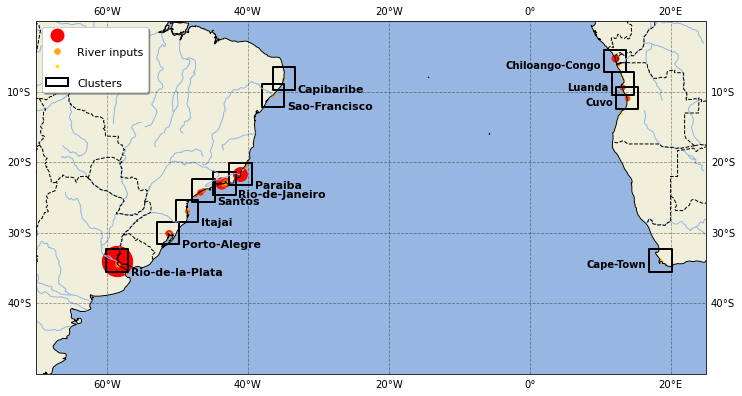

In [89]:
N = 40

x_colors = np.linspace(0, 1, N)
colors = cm.get_cmap('autumn')(x_colors)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -50, 0), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle='--')
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,
            color='black', linestyle='--', alpha=0.4)
for i in range(N):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i],
                color=colors[i], s=sorted_rivers['i_mid'][i]*0.3,
              label='River input')
    
    
Sudamerica = ['Paraiba', 'Itajai', 'Rio-de-la-Plata',
              'Rio-de-Janeiro', 'Porto-Alegre', 'Santos', 
              'Capibaribe', 'Sao-Francisco']
for loc in Sudamerica:
    ax.scatter(cluster_locations[loc][1], cluster_locations[loc][0], 
               s=500, marker='s', linewidths=2, edgecolors='k', facecolor="None",
              label='Cluster')
    ax.text(cluster_locations[loc][1]+2, cluster_locations[loc][0]-2, s=loc,
           fontsize=11, weight='bold')
    

Africa = ['Luanda', 'Cuvo', 'Chiloango-Congo', 'Cape-Town']
for loc in Africa:
    ax.scatter(cluster_locations[loc][1], cluster_locations[loc][0], 
               s=500, marker='s', linewidths=2, edgecolors='k', facecolor="None",
              label='Cluster')
    ax.text(cluster_locations[loc][1]-2, cluster_locations[loc][0]-1, s=loc,
           fontsize=10, ha='right', weight='bold')



legend_elements = [Line2D([0], [0], marker='o', color='w', label='',
                          markerfacecolor=colors[0], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='River inputs',
                          markerfacecolor=colors[25], markersize=7.5),
                   Line2D([0], [0], marker='o', color='w', label='',
                          markerfacecolor=colors[35], markersize=5),
                  Rectangle((0,0), 0, 2, facecolor='None', edgecolor='k',
                            lw=2, label='Clusters')]

ax.legend(handles=legend_elements, loc='upper left', shadow=True,
         fontsize=11)



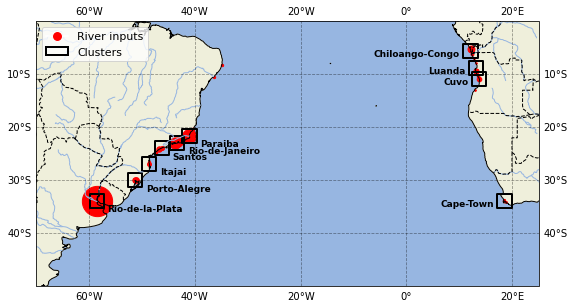

In [110]:
N = 40

x_colors = np.linspace(0, 1, N)
colors = cm.get_cmap('autumn')(x_colors)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -50, 0), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle='--')
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,
            color='black', linestyle='--', alpha=0.4)
for i in range(N):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i],
                color='red', s=sorted_rivers['i_mid'][i]*0.3,
              label='River input')
    
    
Sudamerica = ['Paraiba', 'Itajai', 'Rio-de-la-Plata', 'Rio-de-Janeiro', 'Porto-Alegre', 'Santos']
for loc in Sudamerica:
    ax.scatter(cluster_locations[loc][1], cluster_locations[loc][0], 
               s=200, marker='s', linewidths=2, edgecolors='k', facecolor="None",
              label='Cluster')
    ax.text(cluster_locations[loc][1]+2, cluster_locations[loc][0]-2, s=loc,
           fontsize=9, weight='bold')
    

Africa = ['Luanda', 'Cuvo', 'Chiloango-Congo', 'Cape-Town']
for loc in Africa:
    ax.scatter(cluster_locations[loc][1], cluster_locations[loc][0], 
               s=200, marker='s', linewidths=2, edgecolors='k', facecolor="None",
              label='Cluster')
    ax.text(cluster_locations[loc][1]-2, cluster_locations[loc][0]-1, s=loc,
           fontsize=9, ha='right', weight='bold')



# legend_elements = [Line2D([0], [0], marker='o', color='w', label='',
#                           markerfacecolor=colors[0], markersize=15),
#                    Line2D([0], [0], marker='o', color='w', label='Lebreton',
#                           markerfacecolor=colors[0], markersize=10),
#                    Line2D([0], [0], marker='o', color='w', label='river inputs',
#                           markerfacecolor=colors[0], markersize=7.5),
#                    Line2D([0], [0], marker='o', color='w', label='',
#                           markerfacecolor=colors[0], markersize=5),
#                   Rectangle((0,0), 0, 2, facecolor='None', edgecolor='k',
#                             lw=2, label='Clusters')]

legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='River inputs',
                          markerfacecolor=colors[0], markersize=10),
                  Rectangle((0,0), 0, 2, facecolor='None', edgecolor='k',
                            lw=2, label='Clusters')]

ax.legend(handles=legend_elements, loc='upper left',
         fontsize=11)

plt.savefig('../article_figs/clusters.png', dpi=150)

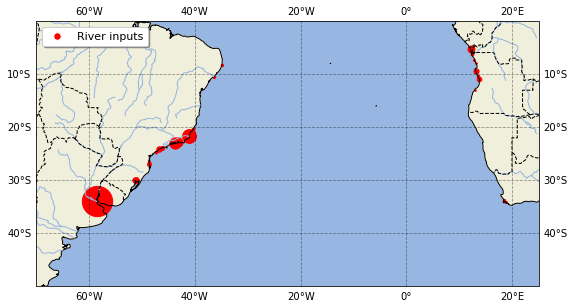

In [20]:
N = 40

x_colors = np.linspace(0, 1, N)
#colors = cm.get_cmap('autumn')(x_colors)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -50, 0), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle='--')
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,
            color='black', linestyle='--', alpha=0.4)

for i in range(N):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i],
                color='red', s=sorted_rivers['i_mid'][i]*0.3,
              label='River input')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='River inputs',
                          markerfacecolor=colors[0], markersize=7.5)]
                   

ax.legend(handles=legend_elements, loc='upper left', shadow=True,
         fontsize=11)

plt.savefig('../presentation/images/river_inputs.png', dpi=120)

In [21]:
anual_totals = sorted_rivers[['i_high','i_mid','i_low']].sum()

In [93]:
cluster_percentage = {}
number_rivers_considered = 0
total_percent = np.array([0, 0, 0, 0])#low, mid, high, avg

for loc in cluster_locations:
    loc_df = rivers_per_location(sorted_rivers, cluster_locations[loc], 1)
    number_rivers_considered += loc_df.shape[0]
    
    high = loc_df['i_high'].sum()/anual_totals['i_high']
    mid = loc_df['i_mid'].sum()/anual_totals['i_mid']
    low = loc_df['i_low'].sum()/anual_totals['i_low']
    avg = (high+mid+low)/3
    print(loc, loc_df.shape[0], avg)
    total_percent = total_percent + np.array([low, mid, high, avg])
    #print(loc, 'high', high, 'mid', mid, 'low', low)

    cluster_percentage[loc] = [high, mid, low, avg]
    

Luanda 23 0.01798828861153176
Cuvo 25 0.01607894821811853
Chiloango-Congo 24 0.032493461633735406
Cape-Town 39 0.008326989083182286
Rio-de-la-Plata 63 0.5303407615398025
Porto-Alegre 55 0.036245238936315816
Santos 26 0.026659740897815185
Paraiba 27 0.10861700443862314
Itajai 29 0.013284455848904394
Rio-de-Janeiro 25 0.1654405573347816
Sao-Francisco 27 0.003501478639341113
Capibaribe 33 0.007423042057888726


In [92]:
total_percent

array([0.97515285, 0.9674703 , 0.95657675, 0.96639997])

In [76]:
number_rivers_considered

336

In [95]:
priors = pd.DataFrame(cluster_percentage).T
priors = priors.rename(columns={0:'i_high', 1:'i_mid', 2:'i_low', 3:'Mean'})
# priors = priors.sort_values('i_high', ascending=False)

true_priors = priors

In [96]:
aux = pd.DataFrame({'OTHER': 1 - priors.sum().values}).T #'CLUSTERS-TOTAL': priors.sum().values, 
aux = aux.rename(columns={0:'i_high', 1:'i_mid', 2:'i_low', 3:'Mean'})

In [97]:
priors = pd.concat([priors, aux], axis=0)

In [98]:
for col in true_priors.keys():
    true_priors[col] = true_priors[col]/true_priors[col].sum()
    
true_priors.to_csv('../data/sources/river_inputs.csv')
true_priors

,i_high,i_mid,i_low,Mean
Luanda,0.021404,0.018472,0.016017,0.018614
Cuvo,0.019093,0.016527,0.014340,0.016638
Chiloango-Congo,0.037704,0.033477,0.029766,0.033623
Cape-Town,0.010517,0.008477,0.006891,0.008617
Rio-de-la-Plata,0.511426,0.550186,0.584026,0.548780
Porto-Alegre,0.043053,0.037254,0.032313,0.037505
Santos,0.032165,0.027332,0.023348,0.027587
Paraiba,0.111575,0.112690,0.112902,0.112393
Itajai,0.016896,0.013496,0.010905,0.013746
Rio-de-Janeiro,0.181526,0.171124,0.161125,0.171193


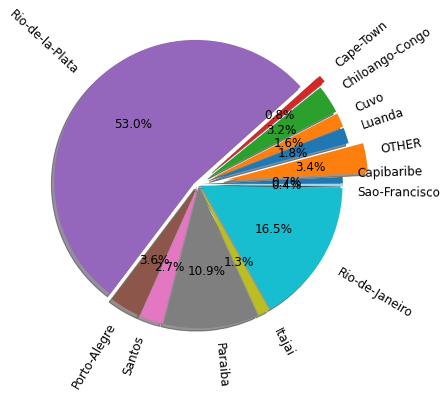

In [107]:
x_colors = np.linspace(0, 1, 11)
cs = cm.get_cmap('tab20')(x_colors)

explode = [0.1, 0.1, 0.1, 0.15, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.2]

plt.figure(figsize=(7,6.5))
wedgeprops = {'fontsize': 12}
plt.pie(priors['Mean'], labels=priors.index,
        colors=cs, autopct='%.1f%%',
       shadow=True, explode=explode,
       rotatelabels=True, startangle=15,textprops=wedgeprops);

plt.savefig('../presentation/images/river_input_pie.png', dpi=120)

In [49]:
priors.index

Index(['Luanda', 'Cuvo', 'Chiloango-Congo', 'Cape-Town', 'Rio-de-la-Plata',
       'Porto-Alegre', 'Santos', 'Paraiba', 'Itajai', 'Rio-de-Janeiro',
       'OTHER'],
      dtype='object')

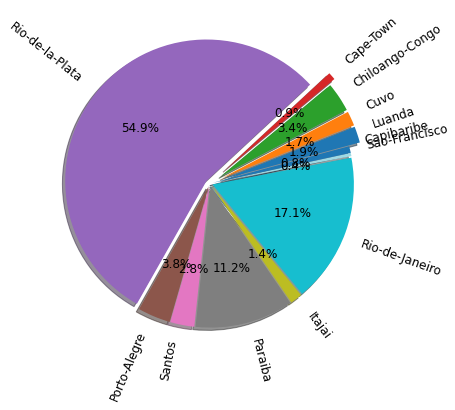

In [108]:
explode = [0.1, 0.1, 0.1, 0.15, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

plt.figure(figsize=(7,6.5))
wedgeprops = {'fontsize': 12}
plt.pie(true_priors['Mean'], labels=true_priors.index,
        colors=cs, autopct='%.1f%%',
       shadow=True, explode=explode,
       rotatelabels=True, startangle=15,textprops=wedgeprops);

plt.savefig('../presentation/images/priors_pie.png', dpi=120)

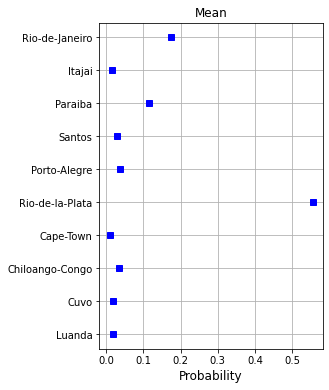

In [436]:
plt.figure(figsize=(4,6))
plt.plot(true_priors['Mean'], true_priors.index, 'bs');
plt.title('Mean')
plt.xlabel('Probability', fontsize=12)
plt.grid()
plt.savefig('../presentation/images/priors_chart.png', dpi=120)

In [414]:
reduced_idx = ['Cape-Town', 'Rio-de-la-Plata','Paraiba', 'Rio-de-Janeiro']
reduced = priors.loc[reduced_idx]
reduced

for col in reduced.keys():
    reduced[col] = reduced[col]/reduced[col].sum()
    
reduced

,i_high,i_mid,i_low,Mean
Cape-Town,0.012903,0.010062,0.007967,0.010246
Rio-de-la-Plata,0.627483,0.653058,0.675218,0.652546
Paraiba,0.136895,0.133760,0.130531,0.133645
Rio-de-Janeiro,0.222719,0.203120,0.186284,0.203563


/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  


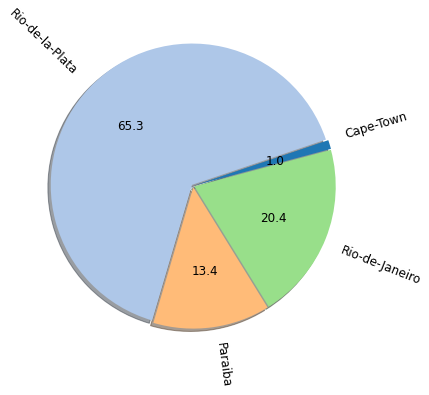

In [419]:
explode = [0.01, 0.01, 0.01, 0.01]

plt.figure(figsize=(7,6.5))
wedgeprops = {'fontsize': 12}
plt.pie(reduced['Mean'], labels=reduced.index,
        colors=cs, autopct='%.1f',
       shadow=True, explode=explode,
       rotatelabels=True, startangle=15,textprops=wedgeprops);


In [415]:
priors.to_csv('../data/sources/reduced_river_inputs.csv')

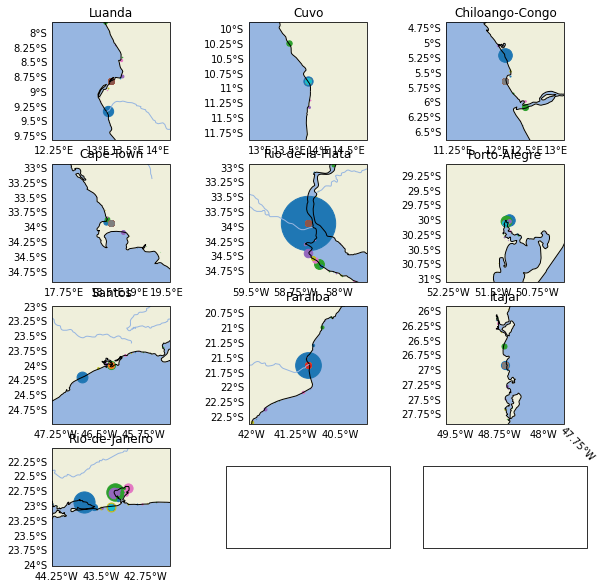

In [378]:
fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
r = 1
i = 0
for k, loc in enumerate(cluster_locations):
    j = k%3
    lat_BA, lon_BA = cluster_locations[loc]
    
    ax[i,j].set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
    ax[i,j].add_feature(cfeature.OCEAN)
    ax[i,j].add_feature(cfeature.LAND)
    ax[i,j].add_feature(cfeature.COASTLINE)
    ax[i,j].add_feature(cfeature.RIVERS)
    ax[i,j].set_title(loc)
    g1 = ax[i,j].gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,
            color='black', linestyle='--', alpha=0.0)
    g1.top_labels = False
    g1.right_labels = False

    loc_df = rivers_per_location(sorted_rivers, cluster_locations[loc], 1)
    for m in loc_df.index:
        ax[i,j].scatter(loc_df['X'][m], loc_df['Y'][m], s=loc_df['i_high'][m]*0.5)
        ax[i,j].scatter(cluster_locations[loc][1], cluster_locations[loc][0])
        
    #print(f'({lat_BA:0.5f}, {lon_BA:0.5f})')
    if j%3 == 2: i+=1 

# ax[3,1].pie(priors['i_high'], labels=priors.index);
# ax[3,1].set_title('i_high');
# ax[3,2].pie(priors['i_mid'], labels=priors.index);
# ax[3,2].set_title('i_mid');
# plt.tight_layout()

In [97]:
parcels_origin = {'Luanda': (-9.3, 13.),
                 'Cuvo': (-10.87917, 13.7),
                 'Paraíba do Sul': (-21.6208, -40.9),
                 'Itajaí-Açu': (-26.9125, -48.5),
                 'Chiloango-Congo': (-5.6442, 12.05),
                 'Cape-Town': (-33.93, 18.2),
                 'Rio-de-la-Plata': (-34.3, -58.2),
                 'Rio-de-Janeiro': (-23.1, -43.32083),
                 'Porto-Alegre': (-32.15, -51.9),
                 'Santos': (-24.05, -46.2958)}

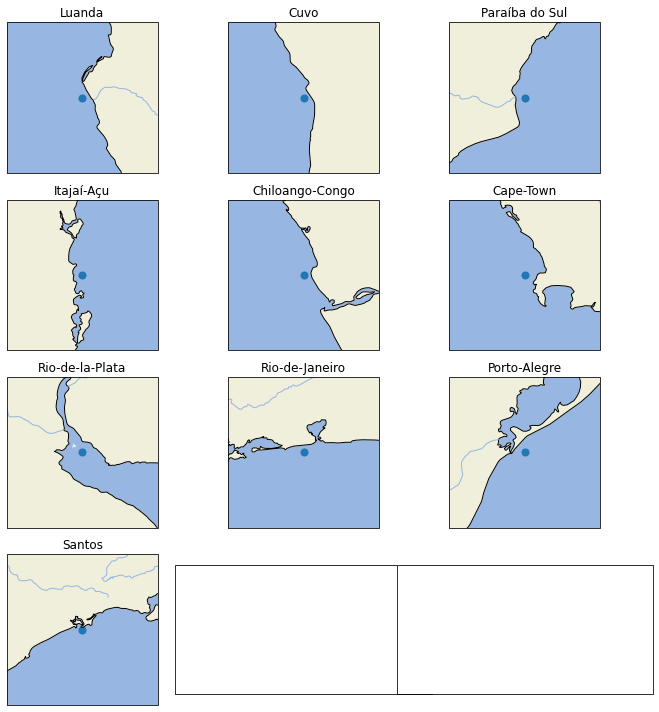

In [98]:
fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
r = 1
i = 0
for k, loc in enumerate(parcels_origin):
    j = k%3
    lat_BA, lon_BA = parcels_origin[loc]
    
    ax[i,j].set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
    ax[i,j].add_feature(cfeature.OCEAN)
    ax[i,j].add_feature(cfeature.LAND)
    ax[i,j].add_feature(cfeature.COASTLINE)
    ax[i,j].add_feature(cfeature.RIVERS)
    ax[i,j].set_title(loc)
    ax[i,j].scatter(lon_BA, lat_BA, s=50)
    
    if j%3 == 2: i+=1 

plt.tight_layout()

In [101]:
import pickle
f = open("../../South_Atlantic_Gyre_experiment/river_sources.pkl","wb")
pickle.dump(parcels_origin, f)
f.close()

In [105]:
infile = open("../../South_Atlantic_Gyre_experiment/river_sources.pkl",'rb')
pickle.load(infile)

{'Luanda': (-9.3, 13.0),
 'Cuvo': (-10.87917, 13.7),
 'Paraíba do Sul': (-21.6208, -40.9),
 'Itajaí-Açu': (-26.9125, -48.5),
 'Chiloango-Congo': (-5.6442, 12.05),
 'Cape-Town': (-33.93, 18.2),
 'Rio-de-la-Plata': (-34.3, -58.2),
 'Rio-de-Janeiro': (-23.1, -43.32083),
 'Porto-Alegre': (-32.15, -51.9),
 'Santos': (-24.05, -46.2958)}

In [99]:
total_plastic = sorted_rivers['i_low'].sum()


In [67]:
percent = sorted_rivers['i_low']/total_plastic

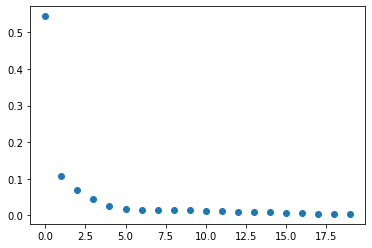

In [68]:
plt.scatter(sorted_rivers.index[:20], percent[:20])

In [72]:
percent[:100].sum()

0.9950030647449724

In [74]:
rivers_per_location(sorted_rivers, city_coords['Buenos-Aires'], 0.1)

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-60, 25, -50, -5], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
for i in range(10):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i], label=i)
ax.legend(loc='upper left', shadow=True)

,index,X,Y,i_mid,i_low,i_high,i_mid_jan,i_low_jan,i_high_jan,i_mid_feb,...,runoff_may,runoff_jun,runoff_jul,runoff_aug,runoff_sep,runoff_oct,runoff_nov,runoff_dec,mpw,area
10,38290,-58.345833,-34.629167,77.845779,44.180450,192.495834,10.422643,6.008263,25.309615,9.433189,...,0.223035,0.193547,0.289152,0.214124,0.312134,0.478430,0.708439,0.570747,41558000.0,2.198400e+09
21,38284,-58.412500,-34.554167,21.795396,11.489428,58.416516,2.309275,1.220010,6.167852,3.517264,...,0.795466,0.578751,0.622888,0.533232,0.786843,1.225536,1.594427,1.671067,6489540.0,9.750000e+07
31,38283,-58.445833,-34.529167,11.470048,5.825765,32.015459,1.219763,0.621038,3.391931,1.852552,...,0.771929,0.564917,0.614317,0.521692,0.772237,1.199186,1.564824,1.626973,4356670.0,6.790000e+07
43,38294,-58.304167,-34.670833,5.877148,2.867302,17.139696,0.644844,0.316428,1.866874,0.647986,...,0.290929,0.274303,0.342336,0.259121,0.348007,0.543149,0.800172,0.734238,6640500.0,1.840000e+08


In [95]:
rivers_per_location(sorted_rivers, city_coords['Buenos-Aires'], 0.10)

,index,X,Y,i_mid,i_low,i_high,i_mid_jan,i_low_jan,i_high_jan,i_mid_feb,...,runoff_may,runoff_jun,runoff_jul,runoff_aug,runoff_sep,runoff_oct,runoff_nov,runoff_dec,mpw,area
10,38290,-58.345833,-34.629167,77.845779,44.180450,192.495834,10.422643,6.008263,25.309615,9.433189,...,0.223035,0.193547,0.289152,0.214124,0.312134,0.478430,0.708439,0.570747,41558000.0,2.198400e+09
21,38284,-58.412500,-34.554167,21.795396,11.489428,58.416516,2.309275,1.220010,6.167852,3.517264,...,0.795466,0.578751,0.622888,0.533232,0.786843,1.225536,1.594427,1.671067,6489540.0,9.750000e+07
31,38283,-58.445833,-34.529167,11.470048,5.825765,32.015459,1.219763,0.621038,3.391931,1.852552,...,0.771929,0.564917,0.614317,0.521692,0.772237,1.199186,1.564824,1.626973,4356670.0,6.790000e+07
43,38294,-58.304167,-34.670833,5.877148,2.867302,17.139696,0.644844,0.316428,1.866874,0.647986,...,0.290929,0.274303,0.342336,0.259121,0.348007,0.543149,0.800172,0.734238,6640500.0,1.840000e+08


In [80]:
len(sorted_rivers)

1218

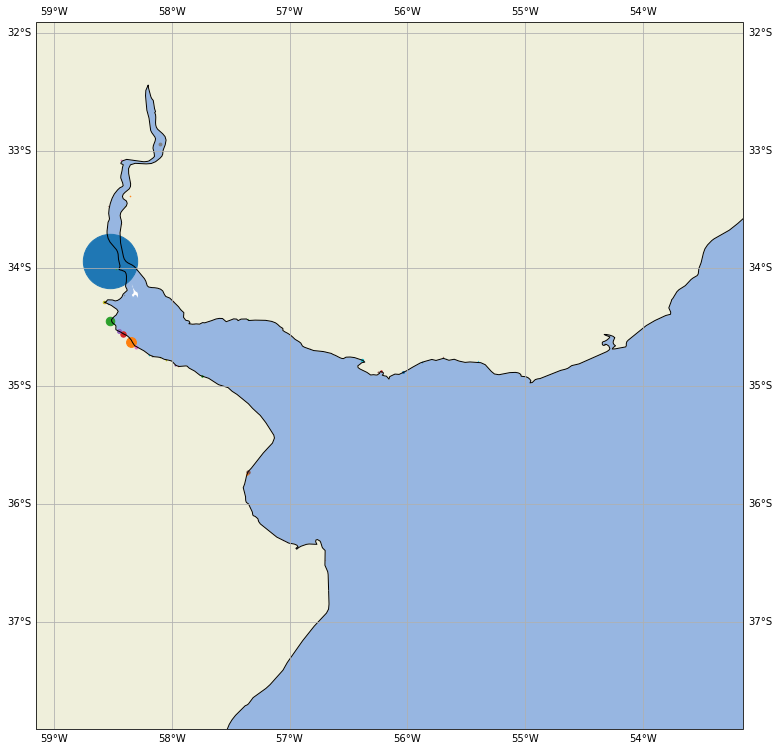

In [115]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

lat_BA, lon_BA = city_coords['Montevideo']
r = 3
ax.set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

rivers = rivers_per_location(sorted_rivers, city_coords['Buenos-Aires'], r)
for i in rivers.index:
    ax.scatter(rivers['X'][i], rivers['Y'][i], label=i, s=rivers['i_high'][i]*0.5)
#ax.legend(loc='upper left', shadow=True)

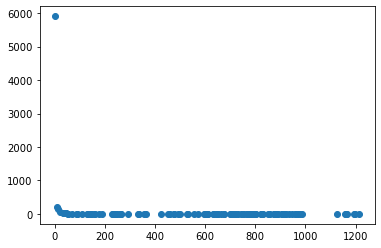

In [103]:
plt.scatter(rivers.index, rivers['i_high'])

In [108]:
len(city_coords)

9

In [320]:
river_names ={'Parana Guazu':(-33.9375, -58.5208), #Rio de la Plata
                'Paraíba do Sul':(-21.6208, -41.0375), #Brazil
                'Guandu':(-22.9292, -43.7792), # Rio de Janeiro
                'Rio Iguaçu':(-22.7625, -43.2542), # Rio de Janeiro
                'Chiloango':(-5.2042, 12.1375), #Angola
                'Jacuí':(-29.9958, -51.2292), #Porto Alegre
                'Itanhaem':(-24.1875, -46.7875), #Santos
                'Jacuí':(-30.0125, -51.2708), #Porto Alegre
                'Pavuna':(-22.7875, -43.2708), # Rio de Janeiro
                'Cuanza':(-9.3292, 13.1625), # Angola
                'Matanza':(-34.6292, -58.3458), #Rio de la Plata
                'Cuvo':(-10.8792, 13.8125), # Angola
                'Macacu':(-22.6958, -43.0375), #Rio
                'Lagoa de Ticuja':(-23.0125, -43.3208), #Rio de Janeiro
                'Luján':(-34.4458, -58.5208), #Rio de la Plata
                'Santos':(-23.9875, -46.2958), #Santos
                'Itajaí-Açu':(-26.9125, -48.6458), #Itajai
                'Valao':(-23.0125, -43.6125), #Rio de Janeiro
                'Ribeira de Iguape':(-24.6375, -47.3875), #Brazil
                'Congo': (-6.0792, 12.4708),
                'Jucu':(-20.4042, -40.3208), #Itaparica Beach
                'Buenos Aires?':(-34.5542, -58.4125),
                '?':(-10.2375, 13.4875), #Angola
                'Santa Maria da Vitoria':(-20.3208, -40.3208), #Itaparica Beach
                'Cape Town':(-33.9125, 18.4708)}

In [322]:
len(river_names)

24

(-33.93750, -58.52083)
(-21.62083, -41.03750)
(-22.92917, -43.77917)
(-22.76250, -43.25417)
(-5.20417, 12.13750)
(-29.99583, -51.22917)
(-24.18750, -46.78750)
(-30.01250, -51.27083)
(-22.78750, -43.27083)
(-9.32917, 13.16250)
(-34.62917, -58.34583)
(-10.87917, 13.81250)
(-22.69583, -43.03750)
(-23.01250, -43.32083)
(-34.44583, -58.52083)
(-23.98750, -46.29583)
(-26.91250, -48.64583)
(-23.01250, -43.61250)
(-24.63750, -47.38750)
(-6.07917, 12.47083)
(-20.40417, -40.32083)
(-34.55417, -58.41250)
(-10.23750, 13.48750)
(-20.32083, -40.32083)
(-33.91250, 18.47083)


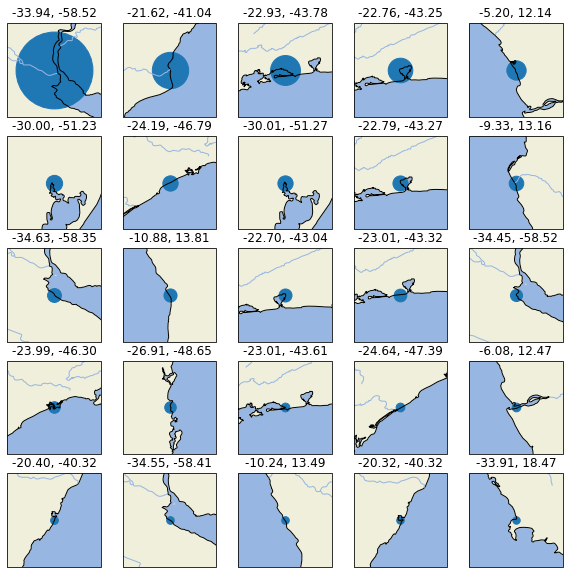

In [331]:
fig,ax = plt.subplots(ncols=5,nrows=5,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
r = 1
i = 0
for k in range(25):
    j = k%5
    lat_BA, lon_BA = sorted_rivers['Y'][k], sorted_rivers['X'][k]
    ax[i,j].set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
    ax[i,j].add_feature(cfeature.OCEAN)
    ax[i,j].add_feature(cfeature.LAND)
    ax[i,j].add_feature(cfeature.COASTLINE)
    ax[i,j].add_feature(cfeature.RIVERS)
    ax[i,j].set_title(f'{lat_BA:0.2f}, {lon_BA:0.2f}')
    ax[i,j].scatter(lon_BA, lat_BA, s=sorted_rivers['i_high'][k])
    
#     rivers = rivers_per_location(sorted_rivers, (lat_BA, lon_BA), r)
#     for m in rivers.index:
#         ax[i,j].scatter(rivers['X'][m], rivers['Y'][m], label=i, s=rivers['i_high'][m]*0.5)
    print(f'({lat_BA:0.5f}, {lon_BA:0.5f})')
    if j%5 == 4: i+=1 
